In [171]:
import os
from pathlib import Path

from IPython.display import Audio

import matplotlib.pyplot as plt
from scipy.special import expit

from tacotron2.hparams import HParams
from tacotron2.evaluators import BaseEvaluator, EmbeddingEvaluator
from tacotron2.evaluators import get_evaluator, plot_syntesis_result

from resemblyzer import preprocess_wav, VoiceEncoder
%matplotlib inline

In [172]:
DEVICE = 'cpu'

In [548]:
hparams_tacotron = HParams.from_yaml(
    'configs/hparams.multispeaker.yaml'
)
hparams_tacotron.sample_embedding_dim = 256
hparams_tacotron.n_symbols = 152
hparams_tacotron.gate_threshold = 0.4

In [549]:
hparams_wg = HParams.from_yaml(
    '../waveglow/configs/hparams.default.yaml'
)

In [932]:
evaluator = get_evaluator(
    evaluator_classname='EmbeddingEvaluator', 
    encoder_hparams=hparams_tacotron, 
    encoder_checkpoint_path='output/2020_02_20__10_17_16__443/models/model_62000.pth', 
    vocoder_hparams=hparams_wg, 
    vocoder_checkpoint_path='/home/e.timofeev/projects/forked/waveglow/models/waveflow_old.pth', 
    use_denoiser=True,
    device=DEVICE)

---

In [946]:
TAKE_MAX = 4
#WAV_EMB_FOLDER = '/home/e.timofeev/data/audio/Ruslan16/'
#WAV_EMB_FOLDER = 'tacotron2/samples/ds/'
WAV_EMB_FOLDER = '/home/e.timofeev/data/audio/book/Alexandr_Slobodskoy/'
WAVS_PATHS = [
    Path(os.path.join(WAV_EMB_FOLDER, x)) 
    for x in os.listdir(WAV_EMB_FOLDER)[:TAKE_MAX]
    if x.endswith('.wav')
]
WAVS = [preprocess_wav(x) for x in WAVS_PATHS]

In [947]:
!tail -n 15 /home/e.timofeev/data/multispeaker_new/dataset/meta_train.txt

wavs/common_voice_ru_18924466.wav|– Кто вас разберет! – пожала плечами Ольга.|609
wavs/015770_RUSLAN.wav|И тогда в зале раздался оживленный голос моего дяди – Вот уже семь лет, как Анелю замуж не берут… |434
wavs/006634_RUSLAN.wav|На лестнице было тихо и холодно. Тенью пронеслась невидимая кошка. Запах жареной рыбы наводил тоску. |434
wavs/005462_RUSLAN.wav|Знайте, что Америка не рай.|434
wavs/common_voice_ru_18923020.wav|Это еще что за пропагандист выискался? Здешний?|238
wavs/011468_RUSLAN.wav|И как ни странно, многие предпочитают бедность. Рафаэль и Муся предпочли богатство. |434
wavs/015824_RUSLAN.wav|Несколько стандартных коричневых построек были окружены чахлыми кустами и деревьями. |434
wavs/common_voice_ru_18936638.wav|Выборы заместителей Председателя Генеральной Ассамблеи на период шестьдесят шестой сессии.|106
wavs/014024_RUSLAN.wav|Значительные события могут произойти только в России! Хиггинс миролюбиво заметил |434
wavs/common_voice_ru_18863206.wav|Об этом свидетельствует п

In [948]:
embedder = VoiceEncoder(device=DEVICE)
embedding = embedder.embed_speaker(WAVS)
text = """
Завтра начнется новый день.
"""

Loaded the voice encoder model on cpu in 0.01 seconds.


In [949]:
%%time
audio, (mel_outputs_postnet, gates, alignments) = evaluator.synthesize(text, embedding - 0.00)
# audio, (mel_outputs_postnet, gates, alignments) = evaluator.synthesize(text)

Warning! Reached max decoder steps
CPU times: user 7min 25s, sys: 29 s, total: 7min 54s
Wall time: 40 s


In [950]:
Audio(data=audio.cpu().numpy(), rate=22050)

In [942]:
Audio(data=audio.cpu().numpy(), rate=22050)

In [937]:
Audio(data=audio.cpu().numpy(), rate=22050)

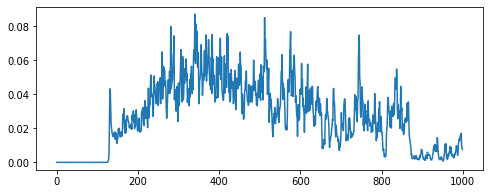

In [943]:
plt.figure(figsize=(8, 3))
plt.plot(expit(gates.cpu().detach().numpy()[0]))

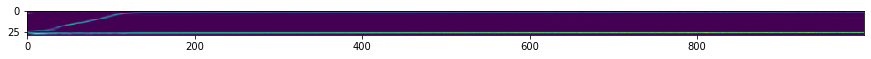

In [944]:
plt.figure(figsize=(15, 15))
plt.imshow(alignments.cpu().detach().numpy()[0].T[::-1])

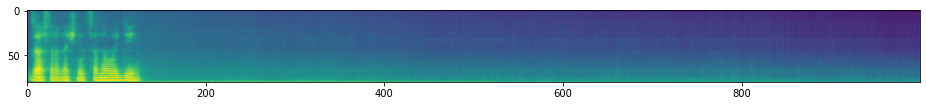

In [945]:
plt.figure(figsize=(16, 16))
plt.imshow(mel_outputs_postnet.cpu().detach().numpy()[0][::-1])